# Homework 7 - DATA 558

#### Arjun Sharma

Classmates I worked with: Adithyaa Vaasen, Raman SV

Note: I have used LLMs for assistance with plot generation and design.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Conceptual Questions

## Problem 1 (7 points): 

Compare and contrast the following unsupervised learning methods: 1)
principle components analysis, 2) k-means clustering, and 3) hierarchical clustering. Please describe
advantages and disadvantages of using one versus the other; make sure you describe a feature that
is special/unique about each of them. 

## Solution:
#### Principle Components Analysis:

Advantages:
1. Excellent for dimensionality reduction in that it identifies principal components that explain the highest amount of variance in the data as a combination of the features that make up the data. 
2. It identifies the directions along which the data variation is the highest.

Disadvantages:
1. It is scale dependent, and hence can be 'thrown off' by variables of different scales
2. It assumes a linear relationship between the variables
3. It is extremely sensitive to outliers

Unique Feature: This is the only method which transforms the data into a different form

#### K-means Clustering:

Advantages:
1. It works well when the clusters are evenly sized and spaced, essentially, it works best when there is appreciable distance between points belonging to separate clusters. 
2. It scales well to larger datasets because it is relatively simpler compared to other clustering techniques.


Disadvantages:
1. It requires you to initialize the number of clusters in advance, which means that you might have to engage in trial-and-error to identify and optimal value of K. This is potentially concerning if you have limited computational resources. 
2. The initial conditions of initializing centroids should be decided upon carefully, as your choice of initial centroids can significantly impact how the algorithm converges. 
3. K-Means Algorithm assumes that the clusters all have similar variance, if that isn't the case with your data, you might get suboptimal results.

Unique Feature: K-Means separates data into K-clusters, where K is predetermined. The algorithm splits the entire datasets into K clusters.



#### Hierarchical Clustering:

Advantages:
1. It represents the datapoints hierarchically when creating clusters from the data. This allows you to easily interpret the relationship between different datapoints at different levels. 
2. You do not have to specify any clusters at the beginning, hence, you can decide how many clusters you feel fits the problem best once the entire dendogram is created.


Disadvantages:
1. It becomes very expensive from a computational standpoint as the number of datapoints increases. 
2. It is sensitive to outliers. 

Unique Feature: Hierarchical clustering creates a hierarchy of clusters, allowing for a flexible and visual representation of the data's structure without requiring a prior specification of the number of clusters.

#### K-means vs Hierarchical:

In favor of K-Means: 
1. K-means is relatively less computationally expensive.
2. K-Means is simpler to explain and interpret

In favor of Hierarchical Clustering:
1. It is independent of the initial conditions, since every datapoint is its own cluster at the beginning.

#### PCA vs K-Means:

In favor of PCA:
1. It strongly reduces the number of dimensions
2. It is not as dependent on initial conditions as K-Means

In favor of K-Means:
1. The results are easier to interpret than those from PCA.

#### PCA vs Hierarchical Clustering:

In favor of PCA:
1. It strongly reduces the number of dimensions
2. The reduction in the number of features allow for computational efficiency.

In favor of Hierarchical Clustering:
1. The results are easier to interpret than those from PCA.

### Problem 2:
Suppose we have 4 observations and we wish to perform hierarchical
clustering and we have a euclidean distance matrix:

[ 0.3 0.7 0.4  |

| 0.3 0.8 0.6  |

| 0.7 0.8 0.40 |

| 0.4 0.6 0.40 ]

For instance, the euclidean distance between 1st and third observation is 0.7.

(a) Using this distance matrix, draw the dendrogram that results from performing hierarchical
clustering using complete linkage.

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

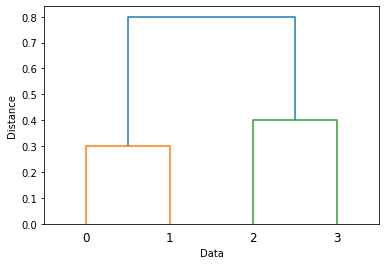

In [3]:
distance_matrix = np.array([0.3,0.7,0.4, 0.8,0.6, 0.4])

linkage_matrix = linkage(distance_matrix, method='complete')

dendrogram(linkage_matrix)

plt.xlabel('Data')
plt.ylabel('Distance')
plt.show()

In hierarchical clustering, all datapoints start off as their own clusters. Therefore, points 0, 1, 2, and 3 are also clusters 0, 1, 2, and 3.

The height at which the clusters are merged represent the distance between them. In this case:
Distance(0,1): 0.3, which is the lowest pairwise distance.

Next, points 2,3 are merged with the distance of 0.4 between them. 

Finally, clusters (0,1) and (2,3) are merged into one with a distance of 0.8 between them.

(b) Repeat the previous part with single linkage.

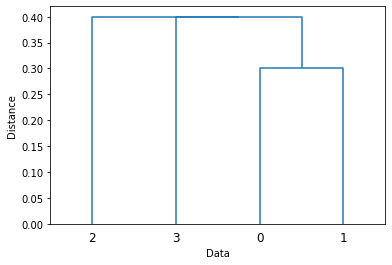

In [4]:
linkage_matrix = linkage(distance_matrix , method='single')

dendrogram(linkage_matrix)

plt.xlabel('Data')
plt.ylabel('Distance')
plt.show()

To construct the dendrogram using single linkage hierarchical clustering, we start with the individual points as separate clusters. We merge points 0 and 1 first because they have the smallest distance of 0.3. Next, we merge points 2 and 3 since their distance of 0.4s. Finally, we combine the resulting clusters, with the top node in the dendrogram having a height of 0.7, representing the shortest distance between any two points across the clusters.

(c) For the single linkage result in part b, suppose we cut the dendrogram such that we obtain
two clusters. Which observations are in each cluster? 

In [5]:
dist_matrix = np.array([[0, 0.3, 0.7, 0.4],
                        [0.3, 0, 0.8, 0.6],
                        [0.7, 0.8, 0, 0.4],
                        [0.4, 0.6, 0.4, 0]])

linkage_matrix = linkage(dist_matrix, method='single')

k = 2
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

for observation, cluster in enumerate(clusters):
    print(f"Observation {observation} is in Cluster {cluster}")

Observation 0 is in Cluster 1
Observation 1 is in Cluster 1
Observation 2 is in Cluster 2
Observation 3 is in Cluster 2


Observations 0 and 1 are assigned to Cluster 1, while Observations 2 and 3 are assigned to Cluster 2.

# Problem 3

(a) Our boss cares a lot about having a clasification algorithm with low variability. We run a
linear soft-margin SVM for a particular choice of regularization parameter C (here, let’s use
1
the notation in the lecture where the objective of SVM has the regularization term C P
i ξi).
We notice that across different datasets, we get vastly different hyperplanes that determine
our decision boundary. So we decrease the value of C

This is potentially good practise. C is a parameter which leads to increased bias and reduced model variability upon its increase and hence we achieve our goal of reducing variability. 

However, another potential solution is to use simpler models which are not too complicated to capture the relationship between the data. If the decision to adjust C is made after exploring such solutions, then this can be considered good practise.

(b) We care about getting a partitioning of the observations using k-means clustering with
(nearly) optimal within-cluster-variation performance. So we run our k-means algorithm
on the dataset once and report our result

This is bad practise. By running the algorithm only once, we leave little scope for understanding how K-means would perform with other values of K .Also, K-Means is sensitive to the initial conditions that we set, such as the datapoints that comprise the centroids when we initiate the algorithm. Hence, there are too many unknowns that have not been explored. This makes it bad practise

(c) We are training a large scale prediction model with millions of covariates. We expect the
decision boundary to be non-linear. We are doing online learning of the decision boundary
so computational efficiency is crucial. We create dummy polynomial variables and run linear
SVM on these created variables.

This is bad practise. While the consideration of using SVM while anticipating a non-linear decision boundary is potentially a sensible decision, there are other concerns:

1. SVM does not work well with high dimensional data, and hence using it with millions of covariates is a bad decision. In addition, using dummy polynomial variables also potentially compromises on the real relationship that the data covers. We are potentially looking at data with a different relationship altogether. 

2. In terms of computational efficiency, we should be looking at reducing dimensionality to suit SVM, while also allowing to reduce the use of computational resources. 

By generating the dummy polynomial variables instead of reducing the dimensions, we end up exacerbating the problem. A solution to reduce dimensions could be the use of PCA. 

(d) We are interested in clustering a collection of observations, with each observation containing
a large number of predictors that are possibly in different units. So we normalize the data,
apply PCA to find a low-dimensional representation, and perform k-means clustering on the
resulting data.

This is good practise. PCA and K-Means are both scale dependent and hence, normalization being a preceeding step to both processis is crucial, which has been done in this scenario. 

Next, knowing that K-Means suffers from curse of dimensionality would warrant the use of dimensionality reduction techniques that capture the variance in the data on a limited number of dimensions. This helps us subvert the problems relating to scaling and the dimensionality of the data.

# Applied Problems

## Question 1

Generate 50 observations of data in three distinct classes (150 obser-
vations total). For observations in Class 1, the 50 variables will be drawn independently from a
N (−1, 1) distribution. For observations in Class 2, the 50 variables will be drawn independently
from a N (0, 1) distribution. For observations in Class 3, the 50 variables will be drawn indepen-
dently from a N (1, 1) distribution. Your final dataset will have 150 total observations and 51
variables (1 variable for the class label, and 50 simulated normal variables).

In [6]:
import numpy as np

In [7]:
class1 = np.random.normal(-1, 1, size=(50, 50))
class2 = np.random.normal(0, 1, size=(50, 50))
class3 = np.random.normal(1, 1, size=(50, 50))
classes = np.array([1, 2, 3]).repeat(50, axis=0)

data = np.concatenate([class1, class2, class3], axis=0)

df = np.column_stack((classes, data))

In [8]:
X = df[:,1:]
y = df[:,0]

In [9]:
print(X.shape)
print(y.shape)

(150, 50)
(150,)


(a) Perform PCA on the 150 observations and plot the first two principal component score vectors.
Use a different color to indicate the observations in each of the three classes. Discuss whether
PCA appears to have done a good job separating the three classes. 

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.decomposition import PCA

In [11]:
class_color = {1: 'r', 2: 'g', 3: 'b'}

In [12]:
pca = PCA(n_components=2)

In [13]:
principal_components = pca.fit_transform(X)
X_fit = pca.fit_transform(X)

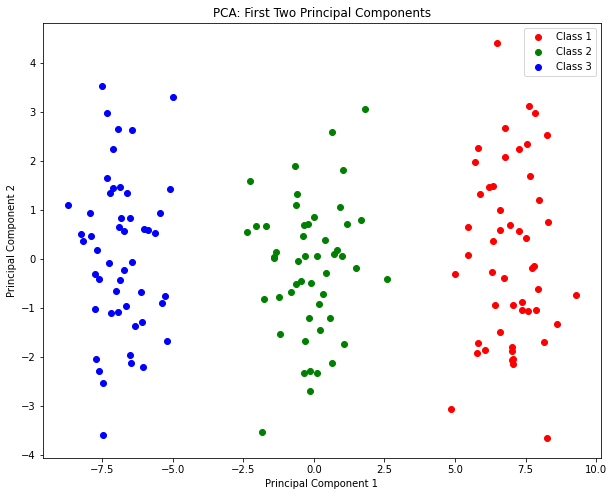

In [14]:
plt.figure(figsize=(10, 8))
for label in np.unique(classes):
    indices = classes == label
    plt.scatter(principal_components[indices, 0],
                principal_components[indices, 1],
                color=class_color[label],
                label=f"Class {int(label)}")
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.legend()
plt.show()

#### Observation:

It appears as though the 2 principal components have captured sufficient variance in the data to satisfactorily separate the three classes. We see that there is noticeable 'space' between the 3 classes when represented along the 2 principal components

Write your own K-means clustering function that has two arguments (K, data) and returns
class labels for each observation in the input dataset. Use your function to perform K-means
clustering of the observations with K = 3. How well do the clusters that you obtained in
K-means clustering compare to the true class labels?

In [15]:
# K-Means
def k_means_clustering(K, data):
    # Randomly initialize cluster centroids
    centroids = data[np.random.choice(range(data.shape[0]), size=K)]
    
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(data.shape[0])
    
    while not np.array_equal(prev_centroids, centroids):
        prev_centroids = centroids.copy()
        
        # Assign data points to the nearest centroid
        for i in range(data.shape[0]):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        # Update centroids by calculating the mean of each cluster
        for k in range(K):
            cluster_points = data[labels == k]
            centroids[k] = np.mean(cluster_points, axis=0)
    labels += 1    
    return labels

In [16]:
def plot_clusters(results):
    class_colors = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}

    plt.figure(figsize=(10, 8))
    for label in np.unique(results):
        indices = results == label
        color = class_colors[label]

        plt.scatter(principal_components[indices, 0], principal_components[indices, 1], color=color, label=f"Class {label}")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Data represented by 2 principal components")
    plt.legend()
    plt.show()

In [17]:
# For K = 3
test_clusters = k_means_clustering(3, X_fit)

In [18]:
test_clusters

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

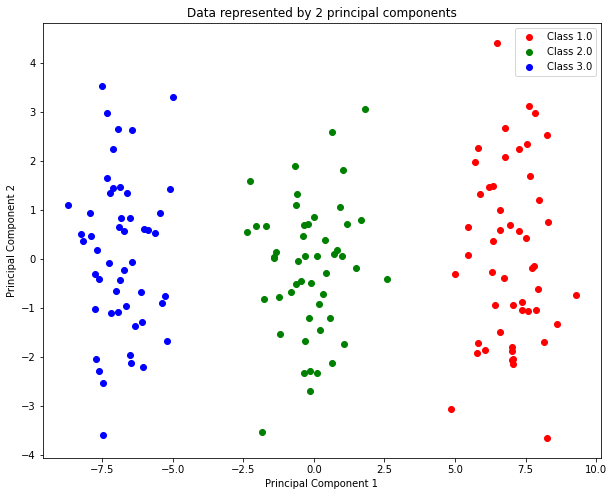

In [19]:
plot_clusters(y)

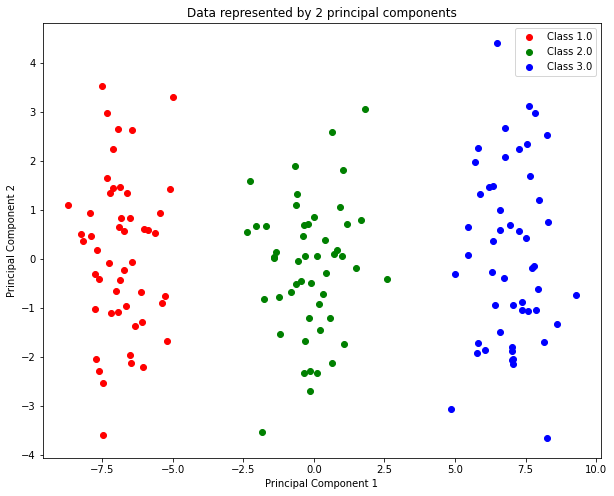

In [20]:
plot_clusters(test_clusters)

In [21]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

#### Observation

It is observed that my implementation is able to exactly separate the datapoints from all three classes.

In [22]:
# K = 2
test_clusters_2 = k_means_clustering(2, X_fit)

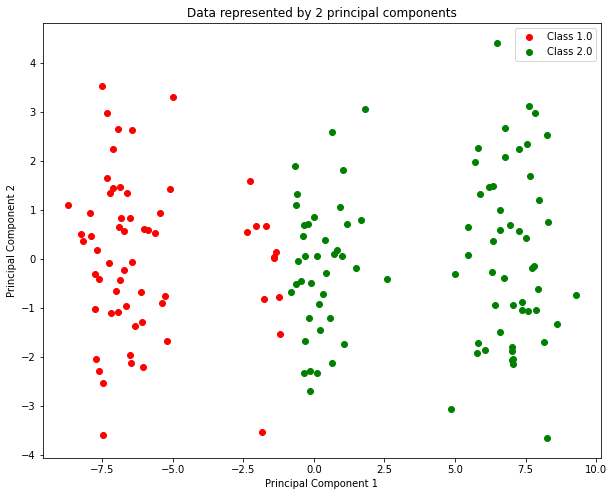

In [23]:
plot_clusters(test_clusters_2)

In [24]:
test_clusters_2

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

#### Observation

With K = 2, it is noticed that most points part of class 2 have been assigned to cluster 3. In addition, most points under class 3 were assigned to cluster 2. 
It appears that the points in class 2 are more similar to those in class 3 than they are to those in class 1.

In [26]:

test_clusters_4 = k_means_clustering(4, X_fit)

In [27]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [28]:
test_clusters_4

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       1., 3., 3., 3., 1., 3., 3., 3., 1., 3., 1., 3., 3., 3., 3., 1., 3.,
       3., 3., 3., 3., 3., 3., 3., 1., 3., 1., 1., 1., 1., 3., 1., 3., 1.,
       1., 3., 3., 3., 1., 3., 1., 3., 1., 3., 3., 1., 3., 1., 3., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

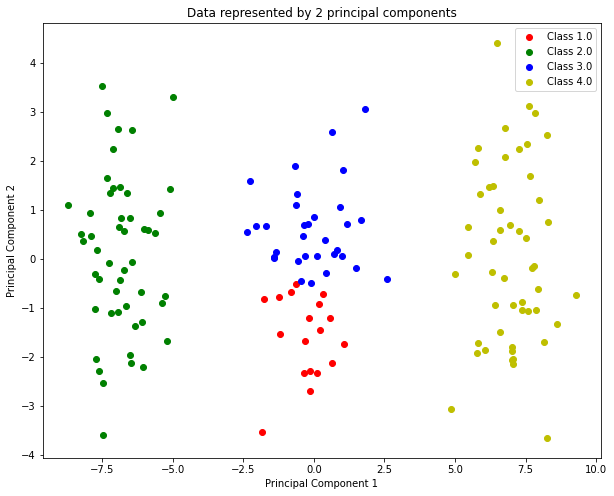

In [29]:
plot_clusters(test_clusters_4)

For K = 4, compared to K = 3, it appears that the points though overlapping, still appear separable. Most points in cluster 3 correspond to those in class 2 previously.


In [30]:
from scipy.spatial.distance import cdist

def hierarchical_clustering(K, data):
    distances = cdist(data, data, metric='euclidean')

    clusters = [[i] for i in range(len(data))]

    while len(clusters) > K:
        min_dist = np.inf
        merge_indices = None

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean(distances[clusters[i], :][:, clusters[j]])

                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)

        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]

    labels = np.zeros(len(data), dtype=int)
    for i, cluster in enumerate(clusters):
        labels[cluster] = i + 1

    return labels

In [31]:
h_clusters_3 = hierarchical_clustering(3, X_fit)

In [32]:
h_clusters_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [33]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

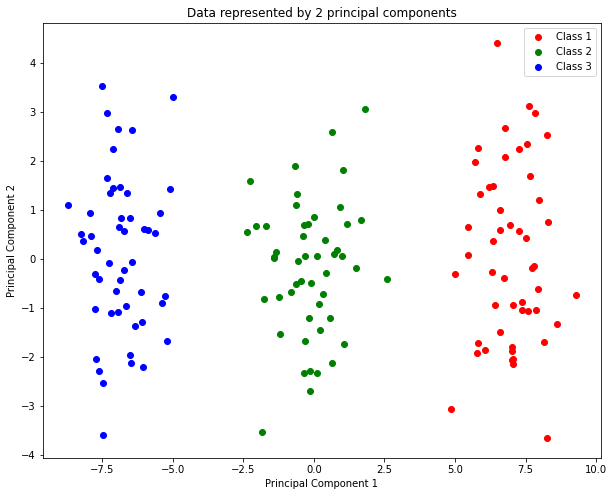

In [34]:
plot_clusters(h_clusters_3)

#### Observation

It is observed that for K=3, the K-means clustering, Hierarchical clustering, the outcomes in terms of clustering are quite similar. They are also very similar to the true class labels.

# Problem 2

In question section, we explore the methods PCA, K-means, and SVM’s
for unsupervised/supervised learning on the MNIST dataset. The MNIST dataset consists of
a large collection of handwritten digits with 60,000 training images.You may load the dataset
from here https://search.r-project.org/CRAN/refmans/dslabs/html/read_mnist.html in R
or https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.
html in python.

(a) Perform PCA based on the covariance matrix (after normalizing the variables). Select the
number of principle components based on the elbow method by creating a scree plot (number
of principle components on the x-axis, and proportion of variance explained on the y-axis).Re-
gardless of the number of principle components you selected, project all the data into the two
principal components (i.e. principle component scores defined in class). Draw a scatter plot
based on the two principle components, Label the points based on the corresponding digits.
Do you see any patterns? 

In [35]:
from sklearn.datasets import load_digits

In [36]:
load_digits()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [37]:
load_digits().data.shape

(1797, 64)

In [38]:
load_digits().feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.DataFrame(data = load_digits().data)
df['target'] = load_digits().target

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [42]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64

In [43]:
X = df.drop('target', axis = 1)
y = df['target']

In [44]:
norm = MinMaxScaler()

In [45]:
X_norm = norm.fit_transform(X)

In [46]:
n_pc = np.arange(1,26,1)

In [47]:
n_pc

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA()
principal_components = pca.fit_transform(X)
variance_sum = {}

In [50]:
for i in n_pc:
    pca = PCA(n_components = i)
    X_fit = pca.fit_transform(X)
    variance_sum[i] = pca.explained_variance_ratio_.cumsum()[-1]

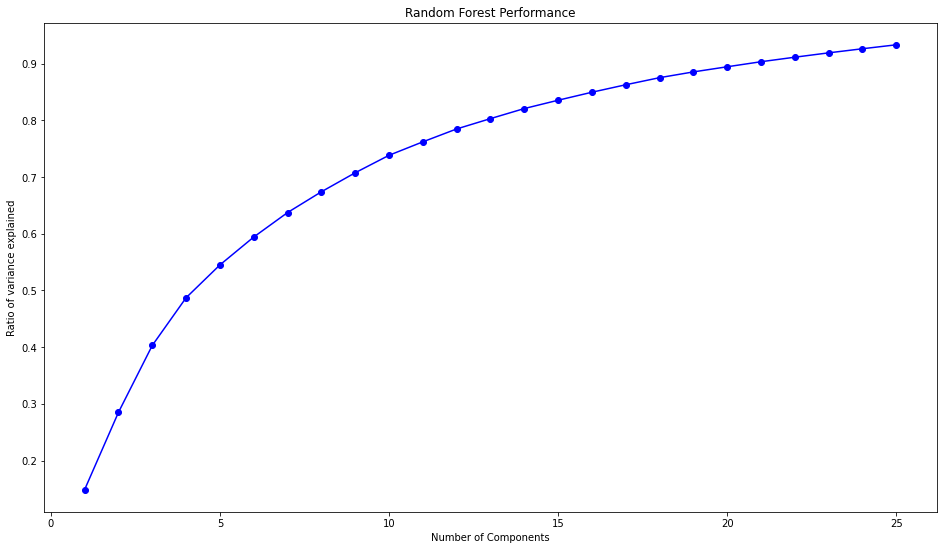

In [51]:
plt.figure(figsize = (16,9))
plt.plot(variance_sum.keys(), variance_sum.values(), color = 'blue', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of variance explained')
plt.title('Random Forest Performance')
plt.show()

In [52]:
pca_2 = PCA(n_components = 2)
X_fit = pca.fit_transform(X_norm)

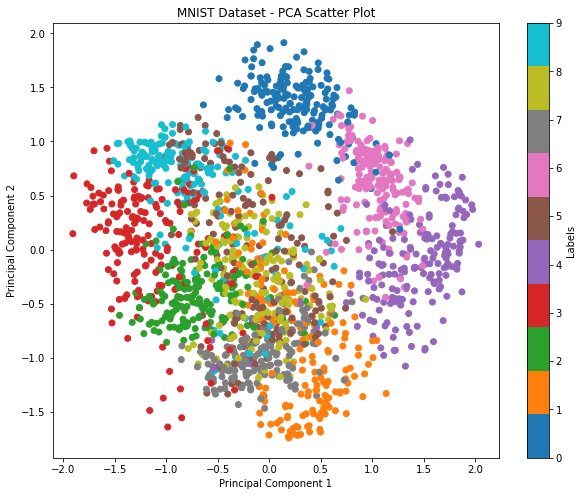

In [53]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fit[:, 0], X_fit[:, 1], c=y, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset - PCA Scatter Plot')
plt.colorbar(label='Labels')
plt.show()

We see that the datapoints corresponding to each number are clustered. We see that 0 and 6 are quite close to each other, while 0 is least similar to 1 in terms of the datapoint placement. Similar inferences can be made for other numbers

In [54]:
from sklearn.cluster import KMeans

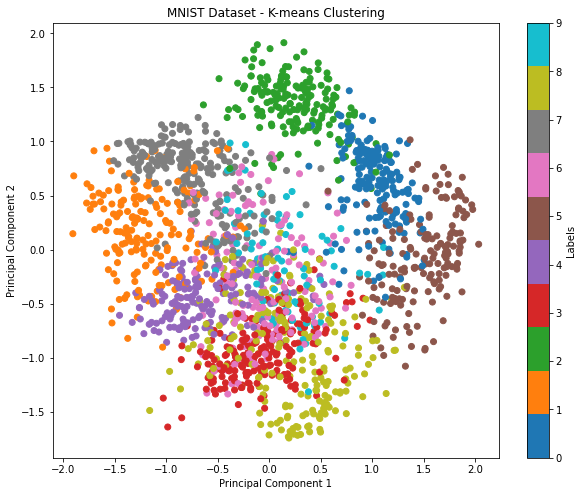

In [55]:
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_fit)

# Plot the scatter plot based on the two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fit[:, 0], X_fit[:, 1], c = labels , cmap = 'tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset - K-means Clustering')
plt.colorbar(label='Labels')

plt.show()

It appears as though the separation between classes is more apparent through K-Means clustering with k = 10, as compared to that observed in PCA. However, the order of the numbers in the output class has been mixed up.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2)

In [58]:
# Set up parameter grid for GridSearchCV
param_grid = {
    'kernel': ['poly', 'rbf'],
    'degree': [1, 2, 3],
    'C': [0.1, 1, 10]
}

In [59]:
# Perform grid search using cross-validation
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'kernel': ['poly', 'rbf']})

In [60]:
# Get the optimal model
best_model = grid_search.best_estimator_

In [61]:
# Evaluate the optimal model on the test set
accuracy = best_model.score(X_test, y_test)

print("Optimal Model:")
print(best_model)
print("Accuracy:", accuracy)

Optimal Model:
SVC(C=10, kernel='poly')
Accuracy: 0.9944444444444445


In [67]:
coefficients = np.abs(model.dual_coef_)

# Get the feature names
feature_names = X.columns

# Create a bar chart of the coefficients
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('SVM Coefficients')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
y_pred = best_model.predict(X_test)

In [64]:
print(confusion_matrix(y_test, y_pred))

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  1 28]]


SVC is able to make the distinction between the different numbers very effectively. There are very few incorrect outcomes.